In [ ]:
import zipfile
import os

# Path to the dataset
zip_path = r"C:\IMP\pollen_grains\data\archive.zip"
extract_path = r"C:\IMP\pollen_grains\data\pollen_data"

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅  Dataset extracted to:", extract_path)

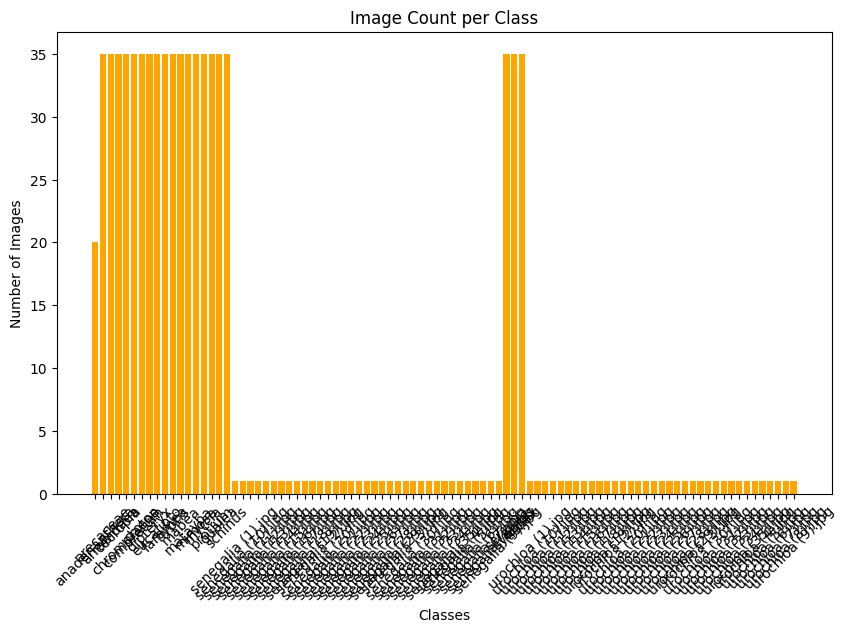

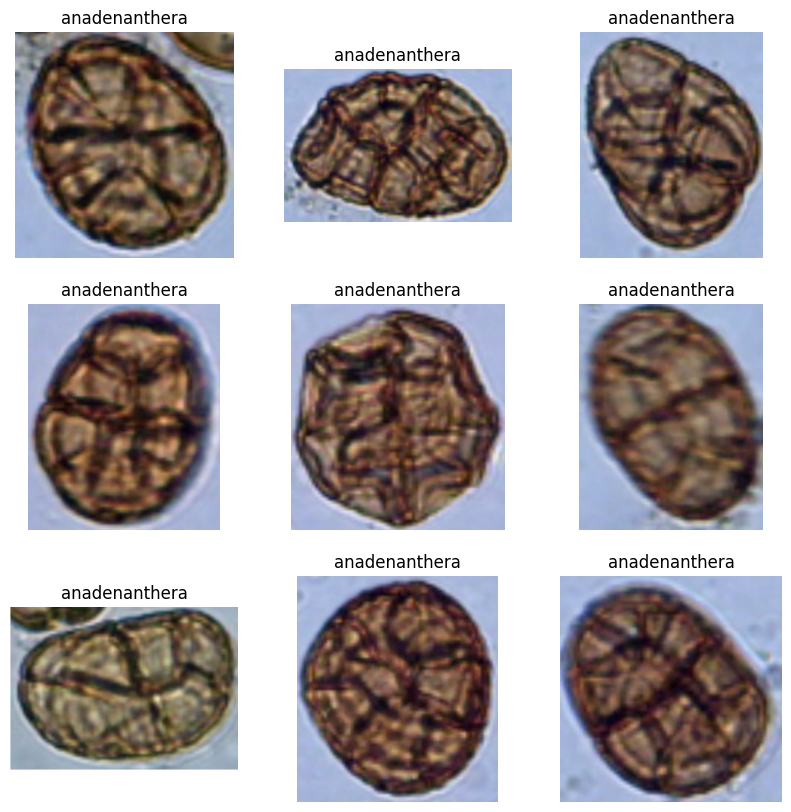

In [2]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

data_path = r"C:\IMP\pollen_grains\data\pollen_data"

# Count files per class
labels = [file.split('_')[0] for file in os.listdir(data_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
count = Counter(labels)

plt.figure(figsize=(10,6))
plt.bar(count.keys(), count.values(), color='orange')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Image Count per Class')
plt.xticks(rotation=45)
plt.show()

# Display sample images
plt.figure(figsize=(10,10))
i = 1
for file in os.listdir(data_path)[:9]:
    img = Image.open(os.path.join(data_path, file))
    plt.subplot(3,3,i)
    plt.imshow(img)
    plt.title(file.split("_")[0])
    plt.axis('off')
    i += 1
plt.show()

In [6]:
import numpy as np
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder

X, y = [], []

for file in os.listdir(data_path):
    if file.endswith(('.png', '.jpg', '.jpeg')):
        label = file.split('_')[0]
        img = load_img(os.path.join(data_path, file), target_size=(128, 128))
        img = img_to_array(img) / 255.0
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ Data shape:", X.shape)
print("✅ Labels shape:", y.shape)

✅ Data shape: (790, 128, 128, 3)
✅ Labels shape: (790,)


In [7]:
from collections import Counter
import os

data_path = r"C:\IMP\pollen_grains\data\pollen_data"

labels = [file.split('_')[0] for file in os.listdir(data_path) if file.endswith(('.jpg', '.jpeg', '.png'))]
count = Counter(labels)

print(count)

Counter({'arecaceae': 35, 'arrabidaea': 35, 'cecropia': 35, 'chromolaena': 35, 'combretum': 35, 'croton': 35, 'dipteryx': 35, 'eucalipto': 35, 'faramea': 35, 'hyptis': 35, 'mabea': 35, 'matayba': 35, 'mimosa': 35, 'myrcia': 35, 'protium': 35, 'qualea': 35, 'schinus': 35, 'serjania': 35, 'syagrus': 35, 'tridax': 35, 'anadenanthera': 20, 'senegalia (1).jpg': 1, 'senegalia (10).jpg': 1, 'senegalia (11).jpg': 1, 'senegalia (12).jpg': 1, 'senegalia (13).jpg': 1, 'senegalia (14).jpg': 1, 'senegalia (15).jpg': 1, 'senegalia (16).jpg': 1, 'senegalia (17).jpg': 1, 'senegalia (18).jpg': 1, 'senegalia (19).jpg': 1, 'senegalia (2).jpg': 1, 'senegalia (20).jpg': 1, 'senegalia (21).jpg': 1, 'senegalia (22).jpg': 1, 'senegalia (23).jpg': 1, 'senegalia (24).jpg': 1, 'senegalia (25).jpg': 1, 'senegalia (26).jpg': 1, 'senegalia (27).jpg': 1, 'senegalia (28).jpg': 1, 'senegalia (29).jpg': 1, 'senegalia (3).jpg': 1, 'senegalia (30).jpg': 1, 'senegalia (31).jpg': 1, 'senegalia (32).jpg': 1, 'senegalia (33)

In [8]:
# Keep only classes with at least 2 images
valid_labels = [label for label, cnt in count.items() if cnt >= 2]

X, y = [], []
for file in os.listdir(data_path):
    if file.endswith(('.jpg', '.jpeg', '.png')):
        label = file.split('_')[0]
        if label in valid_labels:
            img = load_img(os.path.join(data_path, file), target_size=(128, 128))
            img = img_to_array(img) / 255.0
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

print("Data Shape:", X.shape)

Data Shape: (720, 128, 128, 3)


In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import pickle

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save label encoder for later use
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stop])

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

C:\Users\ponna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │           2,709 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,395,029 (28.21 MB)

 Trainable params: 7,395,029 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 402ms/step - accuracy: 0.0407 - loss: 4.2339 - val_accuracy: 0.1379 - val_loss: 3.0272
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.1017 - loss: 2.9171 - val_accuracy: 0.1983 - val_loss: 2.8151
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.2253 - loss: 2.6266 - val_accuracy: 0.2845 - val_loss: 2.5170
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.3234 - loss: 2.2932 - val_accuracy: 0.3448 - val_loss: 2.1328
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.4318 - loss: 1.8284 - val_accuracy: 0.2500 - val_loss: 2.1004
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.5384 - loss: 1.5096 - val_accuracy: 0.4828 - val_loss: 1.7300
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 323ms/step - accuracy: 0.7003 - loss: 1.0694 - val_accuracy: 0.5172 - val_loss: 1.5130
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.7581 - loss: 0.8620 - val_accuracy: 0.

In [10]:
model.save('pollen_model.h5')
print("✅ Model saved as pollen_model.h5")

✅ Model saved as pollen_model.h5


In [14]:
import tensorflow as tf

# Load your original model
model = tf.keras.models.load_model("pollen_model.h5")

# Convert to quantized TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the compressed model
with open("pollen_model.h5", "wb") as f:
    f.write(tflite_model)

print("✅ Saved as: pollen_model.h5")


INFO:tensorflow:Assets written to: C:\Users\ponna\AppData\Local\Temp\tmpubrvu146\assets


INFO:tensorflow:Assets written to: C:\Users\ponna\AppData\Local\Temp\tmpubrvu146\assets


Saved artifact at 'C:\Users\ponna\AppData\Local\Temp\tmpubrvu146'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 21), dtype=tf.float32, name=None)
Captures:
  1918130911760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130912720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130913104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130911568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130898896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130909840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130906000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1918130910992: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Saved as: pollen_model.h5


In [ ]:
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np
import pickle
import os

app = Flask(_name_)
UPLOAD_FOLDER = 'uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load model and label encoder
model = load_model('pollen_model.h5')
label_encoder = pickle.load(open('label_encoder.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return 'No file uploaded'
    file = request.files['file']
    if file.filename == '':
        return 'No file selected'
    
    file_path = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
    file.save(file_path)

    image = load_img(file_path, target_size=(128, 128))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    pred_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return f'Prediction: {pred_label}'

if _name_ == '_main_':
    app.run(debug=True)

In [ ]:
#HTML page

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Pollen Grain Classification</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            background-image: url("/static/background.jpg"); /* Place your image in static/ */
            background-size: cover;
            background-repeat: no-repeat;
            background-position: center;
            font-family: Arial, sans-serif;
            color: white;
            text-align: center;
        }

        .container {
            background-color: rgba(0, 0, 0, 0.6);
            padding: 40px;
            border-radius: 15px;
            width: 400px;
            margin: 100px auto;
        }

        h1 {
            margin-bottom: 30px;
        }

        input[type="file"] {
            padding: 10px;
            margin-bottom: 20px;
        }

        input[type="submit"] {
            padding: 10px 25px;
            font-size: 16px;
            background-color: #4CAF50;
            border: none;
            color: white;
            cursor: pointer;
            border-radius: 5px;
        }

        input[type="submit"]:hover {
            background-color: #45a049;
        }

        img {
            margin-top: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px #fff;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Pollen Grain Classification</h1>
        <form action="/predict" method="POST" enctype="multipart/form-data">
            <input type="file" name="file" required><br>
            <input type="submit" value="Predict">
        </form>

        {% if prediction %}
            <h2>Prediction: {{ prediction }}</h2>
            <img src="{{ image_path }}" alt="Uploaded Image" style="width: 300px;">
        {% endif %}
    </div>
</body>
</html>

In [ ]:
#LOGOUT.HTML

In [ ]:
<!DOCTYPE html>
<html>
<head><title>Logout</title></head>
<body>
    <h2>You have been logged out.</h2>
</body>
</html>

In [ ]:
PREDICTION.HTML

In [ ]:
<!DOCTYPE html>
<html>
<head><title>Result</title></head>
<body>
    <h2>Prediction: {{ prediction }}</h2>
    <img src="{{ image_path }}" width="200">
    <br><a href="/">Try Another</a>
</body>
</html>

In [ ]:
APP.PY

In [ ]:
from flask import Flask, render_template, request
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import pickle

# Create uploads folder if not exists
UPLOAD_FOLDER = 'uploads'
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load model and label encoder
model = tf.keras.models.load_model('pollen_model.h5')
label_encoder = pickle.load(open('label_encoder.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return "No file uploaded."

    file = request.files['file']
    if file.filename == '':
        return "No selected file."

    if file:
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
        file.save(filepath)

        try:
            image = Image.open(filepath).resize((128, 128))
            image = np.array(image) / 255.0
            image = np.expand_dims(image, axis=0)

            prediction = model.predict(image)
            class_index = np.argmax(prediction)
            class_name = label_encoder.inverse_transform([class_index])[0]

            return render_template('index.html', prediction=class_name, image_path=filepath)

        except Exception as e:
            return f"Error processing image: {e}"

if __name__ == '__main__':
    app.run(debug=True)